In [41]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [42]:
import os
import re
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline
import seaborn as sns
sns.set_style("whitegrid")
import warnings
warnings.filterwarnings("ignore")
import tensorflow as tf
import glob
from tensorflow.keras.preprocessing.image import ImageDataGenerator,load_img

In [44]:
!ls "/content/gdrive/My Drive/project_ML/Test Data"

2017331021  2017331023	2017331028  2017331043	2017331050


In [45]:
test_dir = "/content/gdrive/My Drive/project_ML/Test Data"
train_dir= "/content/gdrive/My Drive/project_ML/Train Data"


In [46]:
print("Train set:")
print("-"*60)
num_2017331021 = len(os.listdir(os.path.join(train_dir, '2017331021')))
num_2017331023 = len(os.listdir(os.path.join(train_dir, '2017331023')))
print(f"2017331021={num_2017331021}")
print(f"2017331023={num_2017331023}")

print("\nTest set:")
print('-'*60)
print(f"2017331021={len(os.listdir(os.path.join(test_dir, '2017331021')))}")
print(f"2017331023={len(os.listdir(os.path.join(test_dir, '2017331023')))}")



Train set:
------------------------------------------------------------
2017331021=3
2017331023=3

Test set:
------------------------------------------------------------
2017331021=2
2017331023=2


In [47]:
P_2017331021 = os.listdir("/content/gdrive/My Drive/project_ML/Train Data/2017331021")
P_2017331021_dir = "/content/gdrive/My Drive/project_ML/Train Data/2017331021"

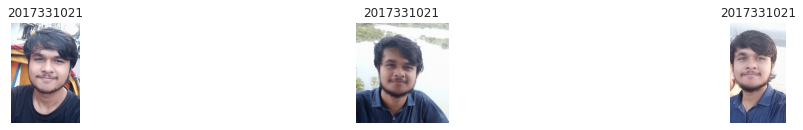

In [48]:
plt.figure(figsize=(15, 5))

for i in range(3):
    plt.subplot(3, 3, i + 1)
    img = plt.imread(os.path.join(P_2017331021_dir, P_2017331021[i]))
    plt.title("2017331021")
    plt.imshow(img, cmap='gray')
    plt.axis('off')
    

plt.tight_layout()

In [49]:
P_2017331023 = os.listdir("/content/gdrive/My Drive/project_ML/Train Data/2017331023")
P_2017331023_dir = "/content/gdrive/My Drive/project_ML/Train Data/2017331023"

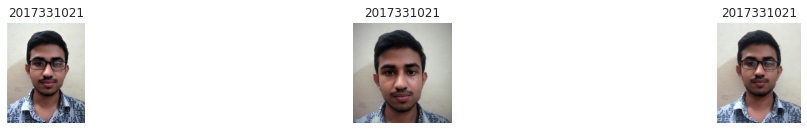

In [50]:
plt.figure(figsize=(15, 5))

for i in range(3):
    plt.subplot(3, 3, i + 1)
    img = plt.imread(os.path.join(P_2017331023_dir, P_2017331023[i]))
    plt.title("2017331021")
    plt.imshow(img, cmap='gray')
    plt.axis('off')
    

plt.tight_layout()

In [51]:
import glob

P_2017331021_train = glob.glob(train_dir+"/2017331021/*.jpg")
P_2017331023_train = glob.glob(train_dir+"/2017331023/*.jpg")

In [52]:
data = pd.DataFrame(np.concatenate([[0]*len(P_2017331023_train) , [1]*len(P_2017331021_train)]),columns=["class"])

In [53]:
print(data)

   class
0      0
1      0
2      0
3      1
4      1
5      1


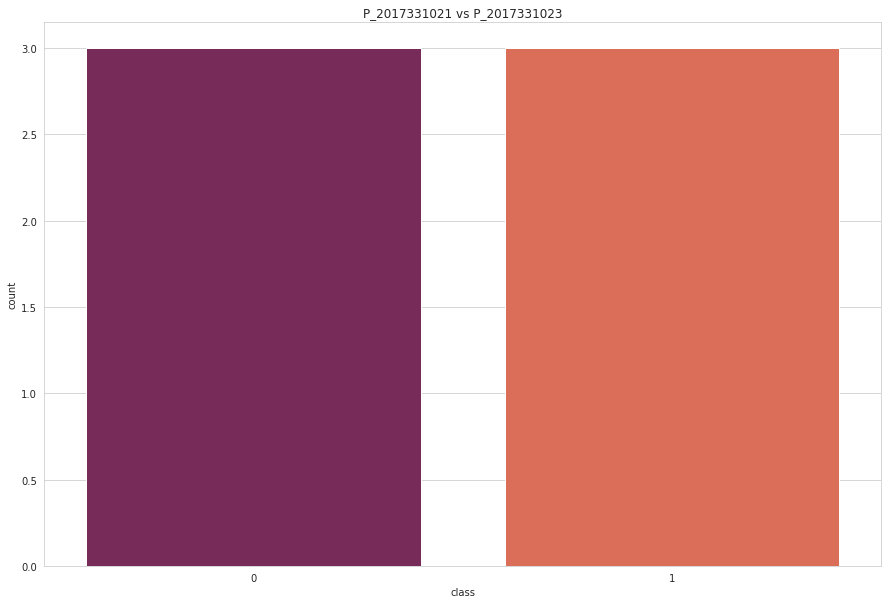

In [54]:
plt.figure(figsize=(15,10))
sns.countplot(data['class'],data=data,palette='rocket')
plt.title('P_2017331021 vs P_2017331023')
plt.show()

In [55]:
img_Datagen = ImageDataGenerator(
        rescale = 1/255,
        shear_range=10,
        zoom_range=0.3,
        horizontal_flip=True,
        vertical_flip=True,
        brightness_range=[0.5,2.0],
        width_shift_range = 0.2,
        rotation_range=20,
        fill_mode = 'nearest'
)
val_Datagen = ImageDataGenerator(
        rescale = 1/255
)

In [56]:
train = img_Datagen.flow_from_directory(train_dir,
                                       batch_size=32,
                                       class_mode='binary',
#                                        target_size=(224,224,3))
                                       )



test = val_Datagen.flow_from_directory(test_dir,
                                       batch_size=2,
                                       class_mode='binary',
#                                        target_size=(224/,224,3))
                                      )

Found 15 images belonging to 5 classes.
Found 10 images belonging to 5 classes.


In [57]:
img, label = next(train)